<div style="text-align: center;">
# マクロ経済特論A
<div style="text-align: center;">
第4回：「オイラー方程式と多項式近似」
<br>
<br>
<div style="text-align: center;">    
2022年10月
<div style="text-align: center;">   
一橋大学　砂川武貴

# イントロダクション

- 第3回では、動的計画法(dynamic programming)を用いて新古典派成長モデルを数値的に解く方法を示した


- 社会計画者（ロビンソン・クルーソー）の最適化問題では、ベルマン方程式を価値関数について解くことで、最適な消費や貯蓄の経路を求めることができた


- この問題は社会計画者問題(Social Planner's problem)とも呼ばれる：無人島に住むロビンソン・クルーソーは、消費や貯蓄と同時に生産を行っていた

- しかし、無人島にロビンソン・クルーソーのほかに、彼に代わって生産を行う別の個人がいるとすると、もともとの問題を分権経済(decentralized economy)における問題として書き換えることができる


- 厚生経済学の第二基本定理(second fundation theorem of welfare economics)が成り立つ場合、分権経済における配分(allocation)と社会計画者問題における配分は一致する

- ところが、厚生経済学の第二基本定理は、分権経済において価格に歪みをもたらす税がある場合は成り立たない。また、（ニューケインジアン・モデルのような）価格の硬直性により相対価格に歪みがある場合も、分権経済における配分は、一般には、社会計画者問題における配分と一致しない


- このような場合には、社会計画者問題の代わりに、分権経済の問題を考える必要がある


- このときに有用なのが、今回説明するオイラー方程式(Euler equation)を用いたアプローチであり、時間反復法(time iteration method)と呼ばれる

- 線形補間やスプライン補間は、いずれも状態空間を分割するグリッドの間を異なる関数で近似する


- 今回説明する多項式を用いた補間は、状態空間全体を一つの関数で近似する


- 同じ問題に異なる方法を適用して求めた解の比較を行い、理解をより深める

# 分権経済と時間反復法
## 分権経済における無限期間モデル

- 前回扱った、無限期間モデルにおける社会計画者の最適化問題は以下の通り。すなわち、ロビンソン・クルーソーは無限期間の消費から得られる効用の割引現在価値を最大化するように、消費と貯蓄を選択する

$$
  \max_{\{c_{t},k_{t+1}\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^{t} u(c_{t})
$$

subject to

$$
  c_{t} + k_{t+1} \leq f(k_{t}), k_{0} \text{ given.}
$$

- ここで、$c_{t}$は$t$期における消費、$k_{t}$は$t$期初の資本である


- 効用関数$u(c_{t})$、生産関数$f(k_{t})$はそれぞれ標準的な仮定（$u'(c_{t})>0$および$u''(c_{t})<0$、$f'(k_{t})>0$および$f''(k_{t})<0$）を満たす

- ここでは、簡単化のために、資本の減耗率は$\delta=1$とする。前回示したように、この場合はモデルの解析的な解が存在する


- 復習：$u(c)=\ln c, f(k)=k^{\alpha}, \delta=1$と特定化した場合、次のような解析的解が存在する

\begin{align*}
  V(k) &= A + B\ln k, \\
  A &= (1-\beta)^{-1}\big[\ln(1-\alpha\beta) + \frac{\alpha\beta}{1-\alpha\beta}\ln\alpha\beta\big], \quad B = \frac{\alpha}{1-\alpha\beta}, \\
  k' &= \alpha\beta k^{\alpha}
\end{align*}

- ラグランジュ未定乗数法を用いると、動的ラグランジュアン(dynamic Lagrangean)は以下のように書くことができる

$$
  \mathcal{L}_{0} \equiv \max_{\{c_{t},k_{t+1}\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^{t} \big\{u(c_{t}) + \lambda_{t}\big(f(k_{t})-k_{t+1}-c_{t}\big)\big\}
$$

$\lambda_{t}$はラグランジュ乗数(Lagrange multiplier)と呼ばれる

- $(c_{t},k_{t+1},\lambda_{t})$のそれぞれについて一階条件を求めると

\begin{align*}
  \frac{\partial \mathcal{L}_{0}}{\partial c_{t}} &= u'(c_{t}) - \lambda_{t} = 0 \\
  \frac{\partial \mathcal{L}_{0}}{\partial k_{t+1}} &= -\lambda_{t}+\beta\lambda_{t+1}f'(k_{t+1}) = 0 \\
  \frac{\partial \mathcal{L}_{0}}{\partial \lambda_{t}} &= f(k_{t})-k_{t+1}-c_{t} = 0
\end{align*}

- 最初の2つの式をまとめると

$$
  u'(c_{t}) = \beta u'(c_{t+1})f'(k_{t+1})
$$

- このオイラー方程式は、均衡条件とも呼ばれる、解の必要条件である。すなわち、最適化問題の解を$c_{t}=h(k_{t})$として、予算制約式$k_{t+1}=f(k_{t})-c_{t}$を用いると、関数$h(k_{t})$は以下の式を満たす

\begin{align*}
  u'(c_{t}) &= \beta u'(c_{t+1})f'(k_{t+1}) \\
  \Leftrightarrow u'(h(k_{t})) &= \beta u'(h(k_{t+1}))f'(k_{t+1}) \\
  &= \beta u'(h(f(k_{t})-h(k_{t})))f'(f(k_{t})-h(k_{t}))
\end{align*}

- したがって、この式を満たすような未知の関数$h(k_{t})$を求めればよいことになる

### 分権経済

- 無人島にもう一人いて、各期$t=0,1,2,\dots$において、ロビンソン・クルーソーから土地と種($k_{t}$)を価格$r_{t}$で借りて作物を作るとしよう


- 利潤を$\pi_{t}$とすると、この個人の利潤最大化問題は以下のように書ける

$$
  \pi_{t} = \max_{k_{t}}f(k_{t})-r_{t}k_{t}
$$

- この問題の最適化条件は、端点解の場合を除くと、$r_{t}=f'(k_{t})$となる

- 一方で、ロビンソン・クルーソーは、生産をする代わりに、地代の支払いを受けて作物を購入するとしよう。すなわち、以下の問題を解く

$$
  \max_{\{c_{t},k_{t+1}\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^{t} u(c_{t})
$$

subject to

$$
  c_{t} + k_{t+1} \leq r_{t}k_{t} + \pi_{t}, k_{0} \text{ given.}
$$

- この問題を、同じように動的ラグランジュアンを用いて解くと

$$
  \mathcal{L}_{0} \equiv \max_{\{c_{t},k_{t+1}\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^{t} \big\{u(c_{t}) + \lambda_{t}\big(r_{t}k_{t}+\pi_{t}-k_{t+1}-c_{t}\big)\big\}
$$

- $(c_{t},k_{t+1},\lambda_{t})$のそれぞれについて一階条件を求めると

\begin{align*}
  \frac{\mathcal{L}_{0}}{c_{t}} &= u'(c_{t}) - \lambda_{t} = 0 \\
  \frac{\mathcal{L}_{0}}{k_{t+1}} &= -\lambda_{t}+\beta\lambda_{t+1}r_{t+1} = 0 \\
  \frac{\mathcal{L}_{0}}{\lambda_{t}} &= r_{t}k_{t}+\pi_{t}-k_{t+1}-c_{t} = 0
\end{align*}

- 最初の2つの式をまとめると

\begin{align*}
  u'(c_{t}) &= \beta u'(c_{t+1})r_{t+1} \\
  &= \beta u'(c_{t+1})f'(k_{t+1})
\end{align*}


- また、予算制約式も（$\pi_{t} = f(k_{t})-r_{t}k_{t}$に注意して）整理してまとめると

\begin{align*}
  c_{t} + k_{t+1} &= r_{t}k_{t} + \pi_{t} \\
  &= f(k_{t})
\end{align*}

- これらの均衡条件は、社会計画者問題の場合と同じである

- ここで、さらにモデルを拡張して、ロビンソン・クルーソーは地代による所得の一部を税率$\tau$で政府に税金として納めるとする。また政府は税収を元に移転$TR_{t}=\tau r_{t}k_{t}$を行う。このとき、消費者の動学最適化問題は

$$
  \max_{\{c_{t},k_{t+1}\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^{t} u(c_{t})
$$

subject to

$$
  c_{t} + k_{t+1} \leq (1-\tau)r_{t}k_{t} + \pi_{t} + TR_{t}, k_{0} \text{ given.}
$$

- このとき、動的ラグランジュアンを用いた解の必要条件、すなわちオイラー方程式は

\begin{align*}
  u'(c_{t}) &= \beta u'(c_{t+1})(1-\tau)r_{t+1} \\
  &= \beta u'(c_{t+1})(1-\tau)f'(k_{t+1})
\end{align*}

となり、社会計画者問題の場合と異なる。したがって、このオイラー方程式を用いて求めた最適化問題の解$c_{t}=h(k_{t})$あるいは消費と資本の流列$\{c_{t},k_{t+1}\}_{t=0}^{\infty}$も異なることになる

- このようなケースでは、社会計画者問題の代わりに、別のアプローチが必要になる

- また、予算制約式も（$\pi_{t} = f(k_{t})-r_{t}k_{t}$に注意して）整理してまとめると

\begin{align*}
  c_{t} + k_{t+1} &= (1-\tau) r_{t}k_{t} + \pi_{t} + TR_{t} \\
  &= f(k_{t})
\end{align*}

\begin{align*}
  & u'(c_{t}) = \beta u'(c_{t+1})(1-\tau)f'(k_{t+1}) \\
  & c_{t} + k_{t+1} = (1-\tau)r_{t}k_{t} + \pi_{t} + TR_{t} \\
  & \pi_{t} = f(k_{t})-r_{t}k_{t} \\
  & TR_{t}=\tau r_{t}k_{t}
\end{align*}


## 時間反復法

- 以下では、簡単化と前回との比較のため、$\delta=1, \tau=0$のケースを考える


- 前回同様、時間をあらわすサブスクリプト$t+1$の代わりに、次期の変数を$k',c'$などと表記する

- 次期の政策関数$c'=h(k')$と今期の資源制約式$k'=f(k)-c$を代入することで、以下の式を得る

\begin{align*}
  u'(c) &= \beta u'(c')f'(k') \\
  &= \beta u'(h(k'))f'(k') \\
  &= \beta u'(h(f(k)-c))f'(f(k)-c)
\end{align*}

オイラー方程式が与えられたとき、それを政策関数$c=h(k)$について解くための方法の一つが、時間反復法(time iteration, TI)と呼ばれる方法である

- 前回学んだ価値関数反復法(VFI)と同様に、TIは、政策関数の流列を作り最終的に収束した関数を解とする


- すなわち、任意に政策関数$h^{(0)}(k)$を推測して、以下の式を$c$について解く

$$
  u'(c) = \beta u'(h^{(0)}(f(k)-c))f'(f(k)-c)
$$

ここで求めた解を、$c=h^{(1)}(k)$とする


- その後、得られた$h^{(1)}(k)$を用いて、以下の式を$c=h^{(2)}(k)$について解く

$$
  u'(c) = \beta u'(h^{(1)}(f(k)-c))f'(f(k)-c)
$$

- そして、関数の流列が収束するまで、つまり$h^{(n-1)}(k)$と$h^{(n)}(k)$が十分近くなるまで、計算を繰り返す

- これは、VFIにおいて、$V^{(n-1)}(k)$を所与としてベルマン方程式を解くことで$V^{(n)}(k)$を計算することとよく似ている


- ここでは、ベルマン方程式の右辺における最大化問題を解く代わりに、オイラー方程式を満たすような$c$を求める求根問題(root-finding problem)を解くのである


- またそのとき、グリッド上にない$h^{(n-1)}(k')$の値について近似する必要がある

## 時間反復法の数値計算

- アルゴリズム


1. グリッド生成：状態空間の評価点を$I=21$個のグリッドに区切る。また、グリッド上における政策関数$h^{(0)}(k^{i})$の初期値を当て推量(initial guess)する。VFIと異なり、政策関数の収束は必ずしも保証されていないため、初期値はより重要になる

2. 収束の基準：収束の基準になるパラメータ$\varepsilon=10^{-5}$を与える

3. 近似・評価：$k^{i}$上にない政策関数の値については近似する必要がある。$h(k;\mathbb{b})$をパラメータ$\mathbb{b}$を使って近似した時の、$k$上での政策関数の値とする

4. 最適化：古い政策関数$h^{(n-1)}(k^{i})$を所与として、各$k^{i}$について、

$$
  u'(c) = \beta u'(h^{(n-1)}(f(k^{i})-c))f'(f(k^{i})-c)
$$

を$c$について解く。オイラー方程式の解である$c$を探すためには、各言語の最適化関数を利用する。特にTIでは、ここをどう工夫するかで収束のスピードや安定性が変わってくる。このステップで新しい政策関数$h^{(n)}(k^{i})$を得る

5. 全ての$k^{i}$について$\|h^{(0)}(k^{i})-h^{(1)}(k^{i})\|<\varepsilon$であればストップ。そうでなければ、$h^{(1)}(k^{i})$を$h^{(0)}(k^{i})$に代入して、ステップ3-4を繰り返す

- VFIと異なり、TIによる繰り返し計算が真の政策関数に収束する保証はない


- このため、TIによって計算した解は、それが適切な解であるかどうか、シミュレーションの結果や計算誤差によってよく吟味する必要がある

- 政策関数の初期値は、ここでは資本のグリッド上の値を用いている


- 最適化には、MATLABであれば、ニュートン法をベースとする関数fsolveを用いる

In [1]:
#必要な関数・モジュールを呼び出す
import numpy as np
from scipy.optimize import fsolve, newton
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import japanize_matplotlib
# from CRRA import CRRA, mu_CRRA
# from EulerEq import EulerEq
# from nti import nti
import time

In [2]:
#カリブレーション
class Model():
    """
    モデルを解くためのパラメータを含む class を定義する。
    """
    def __init__(self,
        beta = 0.96,    # 割引因子
        gamma = 1.0,    # 相対的リスク回避度(異時点間の代替弾力性の逆数)
        alpha = 0.4,    # 資本分配率 
        delta = 1.0,    # 固定資本減耗
        nk = 21,        # 資本のグリッド数
        kmax = 0.5,     # 資本グリッドの最大値
        kmin = 0.05,    # 資本グリッドの最小値
        maxiter = 1000, # 繰り返し計算の最大値
        tol = 1e-5,     # 許容誤差(STEP2)
        ): 
        
        self.beta, self.gamma, self.alpha = beta, gamma, alpha 
        self.delta, self.nk = delta, nk 
        self.kmax, self.kmin = kmax, kmin 
        self.kgrid = np.linspace(kmin,kmax,nk) # 資本のグリッド
        self.maxiter, self.tol = maxiter, tol

In [3]:
def mu_CRRA(m,cons):
        """
        --------------------------------------
        === CRRA Marginal Utility Function ===
        --------------------------------------
        <inputs>
        ・m: パラメータ等を格納したコンストラクタ
        ・cons: 消費量
        <output>
        ・consとgamma の下での限界効用水準
        """
        gamma = m.gamma
        mu = cons ** (-gamma)

        return mu

In [4]:
def EulerEq(m,cons,capital,interp_c):
    """
    ----------------------------------------------
    === オイラー方程式に代入した際の誤差を返す関数 ===
    ----------------------------------------------
    <input>
    ・m: パラメータ等を格納したコンストラクタ
    ・cons: 今期の消費水準
    ・capital: 今期の資本保有量(k)
    ・interp_c: 補間した消費関数
    (※matlabコードでは関数内で消費関数の補間を行っているが、pythonコード上では
    補間した消費関数を引数で先に与える)
    <output>
    ・res: オイラー方程式に代入した際の誤差
    """
    # from CRRA import CRRA, mu_CRRA
    alpha, beta, delta, kgrid = m.alpha, m.beta, m.delta, m.kgrid

    wealth = capital**alpha + (1-delta)*capital
    kprime = wealth - cons
    kprime = max(kgrid[0],kprime) #トリック:k'は正の値しか取らない

    #補間した消費関数を用いて、来期の消費水準を求める。
    cnext =  interp_c(kprime) #c'=h(k')

    #オイラー方程式誤差を求める(u'(c)=1/c を mu_CRRA関数を用いて計算している)
    #res = u'(c) - beta*u'(c')*f'(k')
    res = mu_CRRA(m,cons) - beta*mu_CRRA(m,cnext)*(alpha*kprime**(alpha-1) + 1-delta)

    return res

In [5]:
start = time.time()

print("")
print("-+- Solve a neoclassical growth model with time iteration -+-")
print("")

m = Model()
mu_CRRA_vec = np.vectorize(mu_CRRA)


-+- Solve a neoclassical growth model with time iteration -+-



In [6]:
kgrid, nk, alpha, delta = m.kgrid, m.nk, m.alpha, m.delta
tol, maxiter = m.tol, m.maxiter

#収束の基準に関するパラメータ
it = 1    #ループ・カウンター
dif = 1.0 #政策関数の繰り返し誤差

#STEP 1(b): 政策関数の初期値を当て推量 
cfcn0 = kgrid
cfcn1 = np.zeros(nk)

In [7]:
    #STEP 4: 政策関数を繰り返し計算
    while (it < maxiter) & (dif > tol):

        interp_c = interp1d(kgrid,cfcn0,kind="cubic",fill_value="extrapolate")

        for i in range(nk):

            capital = kgrid[i]
            wealth = (capital ** alpha) + (1-delta)*capital

            #Pythonの最適化関数(newton)を使って各グリッド上の政策関数の値を探す
            #-> オイラー方程式の誤差をゼロにするようなcの値を求める
            #最適化の初期値は古い政策関数の値
            Euler = lambda x: EulerEq(m,x,capital,interp_c)
            cfcn1[i] = newton(Euler, x0 = cfcn0[i], tol=1e-10)

        # 繰り返し計算誤差を確認
        dif = np.max(np.abs(cfcn1-cfcn0))

        #政策関数をアップデート
        cfcn0 = np.copy(cfcn1)

        #繰り返しの結果を表示
        print(f"iteration index: {it}")
        print(f"policy function iteration error: {dif}")

        it += 1 

iteration index: 1
policy function iteration error: 0.09823124494179641
iteration index: 2
policy function iteration error: 0.03169528051254489
iteration index: 3
policy function iteration error: 0.01135201551508469
iteration index: 4
policy function iteration error: 0.0055314515102479755
iteration index: 5
policy function iteration error: 0.0023286829951927324
iteration index: 6
policy function iteration error: 0.0009272273840633671
iteration index: 7
policy function iteration error: 0.0003611997016131907
iteration index: 8
policy function iteration error: 0.00013949230638032883
iteration index: 9
policy function iteration error: 5.368651380632805e-05
iteration index: 10
policy function iteration error: 2.0634279521702936e-05
iteration index: 11
policy function iteration error: 7.926445888817302e-06


In [8]:
end = time.time() - start

#最終的な政策関数が得られてから貯蓄関数を計算
pfcn0 =  (m.kgrid ** m.alpha) + (1-m.delta)*m.kgrid - cfcn0 

#解析的解(for k'=g(k))
p_true = m.beta * m.alpha * (m.kgrid ** m.alpha)

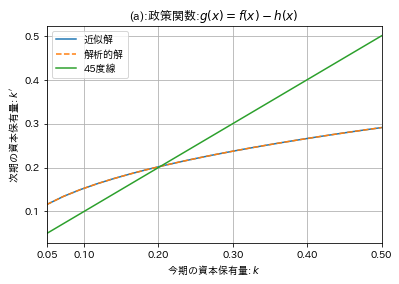

In [9]:
fig, ax = plt.subplots()
ax.plot(m.kgrid,pfcn0,label="近似解")
ax.plot(m.kgrid,p_true,ls="--",label="解析的解")
ax.plot(m.kgrid,m.kgrid,label="45度線")
ax.set(xlabel=r"今期の資本保有量: $k$",ylabel=r"次期の資本保有量: $k'$",title=r"(a):政策関数:$g(x)=f(x)-h(x)$",
xlim=(m.kmin,m.kmax),xticks=[0.05,0.1,0.2,0.3,0.4,0.5])
ax.legend(loc="upper left")
ax.grid()
plt.show()

- VFIと同様、高い精度で真の関数を近似できている

- 政策関数を収束基準としていることから、収束のスピードはVFIと比べて速い

- もっとも、VFIにおいても政策関数を収束基準とすることで収束を速めることはできる

- オイラー方程式における計算誤差は、以下の式で得られる

$$
  \frac{\beta u'\big([g(k^{i})]^{\alpha}-g(g(k^{i}))\big)f'(g(k^{i}))}{u'\big([k^{i}]^{\alpha}-g(k^{i})\big)}-1
$$

ここで、$k'=g(k)=f(k)-h(k)$である

- TIにおいては、この計算誤差が各グリッドでゼロとなるように$c$を求めているため、計算誤差は繰り返し計算誤差とほぼ一致する

- ここでは、グリッドをさらに細かく取り、TIで使用したグリッドの間でも計算誤差をみることにする

In [10]:
#オイラー方程式から誤差を測定
kgrid_err = np.linspace(m.kmin,m.kmax,(m.nk-1)*10+1)
cons_interp = interp1d(m.kgrid,cfcn0,kind="linear",fill_value="extrapolate")
cons = cons_interp(kgrid_err)
LHS = mu_CRRA_vec(m,cons)

kp = (kgrid_err ** m.alpha) + (1-m.delta)*kgrid_err - cons
cnext = cons_interp(kp)
rent = m.alpha*(kp ** (m.alpha-1)) - m.delta
RHS = m.beta * (1+rent) * mu_CRRA_vec(m,cnext)

err = (RHS/LHS) - 1

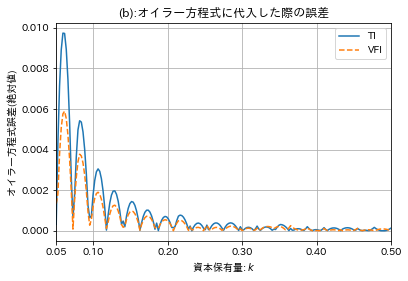

In [11]:
f = open("err_cdp.csv",encoding='utf-8-sig')
err2 = np.loadtxt(f) #VFIでのオイラー方程式誤差

fig, ax = plt.subplots()
ax.plot(kgrid_err,np.abs(err),label="TI")
ax.plot(kgrid_err,np.abs(err2),ls="--",label="VFI")
ax.set(xlabel=r"資本保有量: $k$",ylabel="オイラー方程式誤差(絶対値)",title="(b):オイラー方程式に代入した際の誤差",
xlim=(m.kmin,m.kmax),xticks=[0.05,0.1,0.2,0.3,0.4,0.5])
ax.legend(loc="upper right")
ax.grid()
plt.show()